<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2018


En este notebook se aborda el tema de aprendizaje de máquina para clasificación binaria utilizando Regresión Logística:
1. Propagación hacia adelante (forward propagation)
2. Función de pérdida
3. Función de costo
4. Descenso del gradiente
5. Predicción

<hr>
# 1. Operaciones básicas
## 1.1. Propagación hacia adelante (backward propagation)

In [2]:
import numpy as np

In [3]:
def linear_activation(W, b, X):
    z = np.dot(W.T,X) + b
    
    return z

In [4]:
def sigmoid(z):
    '''
    Returns sigmoid activation for array z
    '''
    a = 1. / (1. + np.exp(-z)) 
    
    return a 

In [5]:
seed = 2
np.random.seed(2)
z = np.random.randn(1,3)
print(sigmoid(z))

[[ 0.39729283  0.485937    0.10562821]]


In [6]:
X = np.array([[1,2,3],[4,5,6]]).T
print("X: ",X)

Y = np.array([[0, 1]])
print("Y: ", Y)

W = np.array([[0.4], [-0.5], [0.01]])
print("W: ", W)

b = 0.3
print("b: ", b)

A = sigmoid(linear_activation(W, b, X))

print("forward propagation: ", A)

('X: ', array([[1, 4],
       [2, 5],
       [3, 6]]))
('Y: ', array([[0, 1]]))
('W: ', array([[ 0.4 ],
       [-0.5 ],
       [ 0.01]]))
('b: ', 0.3)
('forward propagation: ', array([[ 0.4329071 ,  0.36818758]]))


<hr>
## 1.2. Función de perdida

In [7]:
def loss(y, a):
    return -(y * np.log(a) + (1-y) * np.log(1-a))

In [8]:
seed = 2 #to be able to verify your result
np.random.seed(seed)
W = np.random.randn(2,1)
b = np.random.rand()
X = np.random.randn(2, 3)

Y = np.array([[1,1,0]]) #original labels for features X
A = sigmoid(linear_activation(W,b,X)) #forward activation

print("Perdida dato a dato: ", loss(Y, A))

('Perdida dato a dato: ', array([[ 0.22068428,  0.24198147,  1.27491702]]))


<hr>
## 1.3. Función de costo

In [9]:
def cost(logloss):
    return np.mean(logloss)

In [10]:
logloss = np.array([[0.22068428,  0.24198147,  1.27491702]])
print("costo: ", cost(logloss))

('costo: ', 0.57919425666666668)


<hr>
## 1.4. Descenso del gradiente (Gradient Descent) 

In [11]:
seed = 2
np.random.seed(seed)

X = np.random.rand(3,2)
Y = np.array([[0, 1]])

m = X.shape[1]

W = np.array([[0.1], [-0.1], [0.01]])
b = 0.1

print("m: ", m)
print("W inicial: ",W)
print("b inicial: ",b)

('m: ', 2)
('W inicial: ', array([[ 0.1 ],
       [-0.1 ],
       [ 0.01]]))
('b inicial: ', 0.1)


In [14]:
learning_rate = 0.1

for i in range(10000): #1000 iteraciones del descenso del gradiente
    '''
    Activacion hacia adelante
    '''
    Z = linear_activation(W,b,X)
    A = sigmoid(Z)
    
    '''
    Activacion hacia atras - retropropagacion del error
    '''
    dz = A - Y
    dW = np.dot(X,dz.T) / m
    db = np.sum(dz) / m
    
    '''
    Actualizacion de parametros mediante descenso del gradiente
    '''
    W -= learning_rate * dW
    b -= learning_rate * db
    
    J = cost(loss(Y,A))

    if(i%1000 == 0):
        print("costo: ", J)

print("W actualizado: ",W)
print("b actualizado: ",b)
print("costo total: ", J)

('costo: ', 0.12882083422961826)
('costo: ', 0.087027227226455173)
('costo: ', 0.065225729317085313)
('costo: ', 0.05198224216763643)
('costo: ', 0.043130299858207106)
('costo: ', 0.036814427889119504)
('costo: ', 0.032089669813548008)
('costo: ', 0.028426281320521482)
('costo: ', 0.025505078660076473)
('costo: ', 0.023122635937333071)
('W actualizado: ', array([[-17.63109027],
       [ -2.52305203],
       [ -1.97122534]]))
('b actualizado: ', 5.9887518389036334)
('costo total: ', 0.021145150623158339)


## 1.5. Predicción

La predicción consiste en aplicar forward propagation utilizando los W y b optimizados mediante descenso del gradiente.

In [15]:
def predict(W,b,X):
    z = linear_activation(W,b,X)
    A = sigmoid(z)
    return np.round(A)

In [16]:
Y_hat = predict(W,b,X)
print("predicciones: ",np.round(Y_hat))
print("clases originales: ", Y)

('predicciones: ', array([[ 0.,  1.]]))
('clases originales: ', array([[0, 1]]))


<hr>
# 2. Regresión Logística sobre un dataset

In [17]:
'''
Utility functions
'''

import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

def generate_data(data_type, noise=0.2):
    """
    Generate a binary dataset with distribution data_type

    Arguments:
    data_type -- distribution of dataset {moons,circles,blobs}

    Returns:
    X -- features
    Y -- labels
    """ 
    np.random.seed(0)
    if data_type == 'moons':
        X, Y = datasets.make_moons(200, noise=noise)
    elif data_type == 'circles':
        X, Y = sklearn.datasets.make_circles(200, noise=noise)
    elif data_type == 'blobs':
        X, Y = sklearn.datasets.make_blobs(centers=2, cluster_std=noise)
    return X, Y

def visualize_lr(W, b, X, y):
    """
    Plots a classification boundary for a logistic regression model
    defined by W and b, using X (inputs) and y (outputs)

    Arguments:
    data_type -- distribution of dataset {moons,circles,blobs}

    Returns:
    W -- weights of lr model
    b -- bias of lr model
    X -- features
    y -- labels
    """
    X = X.T
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = predict(W,b,np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

<hr>
## 2.1. Generación del dataset

In [18]:
X, Y = generate_data('blobs', 1.5)
Y = Y.reshape(1,len(Y))
print(X.shape)
print(Y.shape)

(100, 2)
(1, 100)


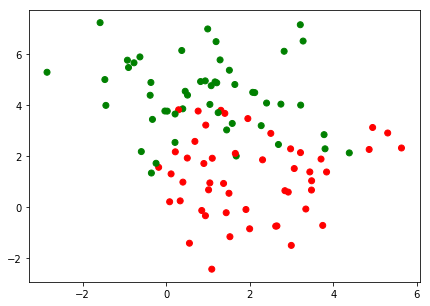

In [19]:
color= ['red' if y == 1 else 'green' for y in np.squeeze(Y)]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

X = X.T

<hr>
## 2.2. Inicialización de parámetros del regresor

In [20]:
#1. inicilicemos parametros W y b
seed = 3
np.random.seed(seed)

m = X.shape[1]

W = np.random.randn(X.shape[0], 1)
b = np.random.random()

print("m: ", m)
print("W inicial: ",W)
print("b inicial: ",b)

('m: ', 100)
('W inicial: ', array([[ 1.78862847],
       [ 0.43650985]]))
('b inicial: ', 0.2909047389129443)


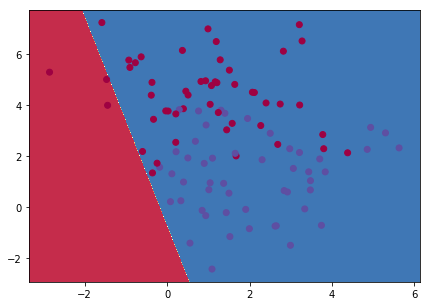

In [21]:
'''
Primero visualicemos cual seria la clasificacion con valores de W y b aleatorios.
'''
visualize_lr(W, b, X, Y)

<hr>
## 2.3. Entrenamiento del regresor mediante descenso del gradiente

In [22]:
#2. Regresion logistica mediante descenso del gradiente

learning_rate = 0.1

num_epochs = 10000

for i in range(num_epochs): #1000 iteraciones del descenso del gradiente
    '''
    Activacion hacia adelante
    '''
    Z = linear_activation(W,b,X)
    A = sigmoid(Z)
    
    '''
    Activacion hacia atras - retropropagacion del error
    '''
    dz = A - Y
    dW = np.dot(X,dz.T) / m
    db = np.sum(dz) / m
    
    '''
    Actualizacion de parametros mediante descenso del gradiente
    '''
    W -= learning_rate * dW
    b -= learning_rate * db
    
    J = cost(loss(Y,A))

    if(i%1000 == 0):
        print("costo: ", J)

print("W actualizado: ",W)
print("b actualizado: ",b)
print("costo final (error), despues de ",i+1," iteraciones: ", J)

('costo: ', 2.0649408845429829)
('costo: ', 0.31803256018005488)
('costo: ', 0.31482114840315384)
('costo: ', 0.31455223365755919)
('costo: ', 0.31452456177654187)
('costo: ', 0.31452154018020911)
('costo: ', 0.31452120391855709)
('costo: ', 0.314521166262129)
('costo: ', 0.31452116203633601)
('costo: ', 0.31452116156178711)
('W actualizado: ', array([[ 0.3003903 ],
       [-1.38985702]]))
('b actualizado: ', 3.3974712751228129)
('costo final (error), despues de ', 10000, ' iteraciones: ', 0.3145211615084984)


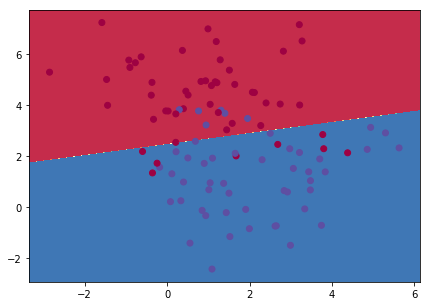

In [23]:
visualize_lr(W, b, X, Y)